## Load MNIST on Python 3.x

In [420]:
import pickle
import gzip
import numpy as np
import tensorflow as tf
from tqdm import tqdm_notebook
import pandas as pd
from keras.utils import np_utils
from sklearn.cluster import KMeans
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata
from scipy import stats

In [421]:
filename = '/Users/ektakatiyar/Downloads/ML/Project3/mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
print("training_data: "+ str(training_data[1][0]))
print("validation_data: "+ str(validation_data[1][0]))
print("test_data: "+ str(test_data[1][0]))
print(test_data[0].shape)
f.close()


training_data: 5
validation_data: 3
test_data: 7
(10000, 784)


In [439]:
majorityListMNIST= []
majorityListUSPS=[]

# Training data

In [423]:
training_label = np.zeros((50000, 10))
training_label[np.arange(50000), training_data[1]] = 1
print(training_label[0])
print(training_label.shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(50000, 10)


# Validation data

In [424]:
validation_label=np.zeros((10000, 10))
validation_label[np.arange(10000), validation_data[1]] = 1
print(validation_label[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Test data

In [425]:
test_label = np.zeros((10000,10))
test_label[np.arange(10000),test_data[1]]=1
print(test_label[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# Load USPS on Python 3.x

In [426]:
from PIL import Image
import os
import numpy as np

In [427]:
USPSMat  = []
USPSTar  = []
curPath  = '/Users/ektakatiyar/Downloads/ML/Project3/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
print("USPSMat: "+str(len(USPSMat)))
print("USPSTar: "+str(len(USPSTar)))
print("savedImg: "+str(savedImg))

USPSMat: 19999
USPSTar: 19999
savedImg: <PIL.Image.Image image mode=P size=28x28 at 0x10AA6A470>


# Logistic regression Model-1

# softmax

In [428]:
def predict(features, weights):
    print("Feature shape :"+ str(features.shape))
    #print("Weights shape :"+ str(weights.shape))
    x = np.dot(features, weights)
    return softmax(x)

In [429]:
def softmax(x):
    ex = np.exp(x)
    sum_ex = np.sum( np.exp(x))
    return ex/sum_ex

# cost function

In [430]:
def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = ( log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum()/observations
    print("Cost: "+str(cost))

    return cost

In [431]:
def update_weights(features, labels, weights, lr):
    #print("weights:"+ str(weights.shape))
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient
    #print("weights :"+ str(weights))

    return weights

In [432]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)
        print(weights.shape)
        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print ("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

In [446]:
def accuracy_model(predicted_labels, actual_labels):
    count=0
    #print("predicted_labels :"+ str(predicted_labels.shape))
    #print("actual_labels :"+ str(actual_labels.shape))
    for i in range(len(predicted_labels)):
        if np.argmax(predicted_labels[i])==np.argmax(actual_labels[i]):
            count=count+1;
    accuracy= (count/len(predicted_labels))*100
    print("Accuracy: "+ str(accuracy))
    LOG1_pred=np.array([np.argmax(t) for t in predicted_labels])
    
    print("Classification report: \n"+ str(classification_report(test_data[1], LOG1_pred)))
    print("Confusion matrix : \n"+ str(confusion_matrix(test_data[1], LOG1_pred)))
    return accuracy

In [447]:
#Training model for different hyperparameters RawData, RawTarget, Weights, learning rate, epochs
#For MNIST dataset
weights,cost=train(training_data[0],training_label,np.zeros((training_data[0].shape[1],10)),0.001,300)
#Cost_function=cost_function(training_data[0],training_label,0)
predictedValLogMNIST=predict(test_data[0],weights)

print("predictedVal :"+str(predictedValLogMNIST.shape))
Model_accuracy=accuracy_model(predictedValLogMNIST,test_label)
#print("Cost_function :"+str(Cost_function))

Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.121317792034866
iter: 0 cost: 13.121317792034866
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.120255772394918
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.119195319935988
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.11813643609406
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.117079122307548
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.116023380017303
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.11496921066667
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.113916615701429
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.112865596569849
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.11181615472269
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000,

(784, 10)
Feature shape :(50000, 784)
Cost: 13.032187845195374
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.031272928613811
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.030359719101481
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.029448218344271
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.028538428031236
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.027630349854585
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.026723985509683
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.025819336695047
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.024916405112409
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.02401519246669
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 13.02311570046598
Feature shape :(50000, 784)
(

Cost: 12.956888668727565
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.956134533765246
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.955382271309194
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.954631883366924
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.95388337195002
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.953136739074129
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.952391986758942
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.95164911702825
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.950908131909925
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.950169033435944
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.949431823642412
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
C

(784, 10)
Feature shape :(50000, 784)
Cost: 12.896185536706724
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.895610543283874
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.895037623047775
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.89446677842296
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.893898011839148
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.89333132573122
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.89276672253925
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.892204204708513
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.89164377468952
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.891085434937956
Feature shape :(50000, 784)
(784, 10)
Feature shape :(50000, 784)
Cost: 12.89052918791482
Feature shape :(50000, 784)
(784

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [448]:
print(predictedValLogMNIST.shape)
newList = np.array([np.argmax(t) for t in predictedValLogMNIST])
majorityListMNIST.append(newList)
print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))

(10000, 10)


In [418]:
#Training model for different hyperparameters RawData, RawTarget, Weights, learning rate, epochs
#For USPS dataset

predictedValLogUSPS=predict(np.array(USPSMat),weights)
print("predictedVal :"+str(predictedValLogUSPS.shape))
Model_accuracy=accuracy_model(predictedValLogUSPS,one_hot_encode(USPSTar,10))
#print("Cost_function :"+str(Cost_function))

print(predictedValLogUSPS.shape)
newList = np.array([np.argmax(t) for t in predictedValLogUSPS])
majorityListUSPS.append(newList)
print("majorityListUSPS shape: "+ str(np.matrix(majorityListUSPS).shape))


Feature shape :(19999, 784)
predictedVal :(19999, 10)
predicted_labels :(19999, 10)
actual_labels :(19999, 10)
Accuracy: 22.716135806790337
Classification report: 
             precision    recall  f1-score   support

          0       0.16      0.75      0.27      2000
          1       0.32      0.06      0.11      2000
          2       0.32      0.38      0.34      1999
          3       0.30      0.40      0.34      2000
          4       0.73      0.18      0.29      2000
          5       0.00      0.00      0.00      2000
          6       0.42      0.12      0.19      2000
          7       0.19      0.08      0.11      2000
          8       0.17      0.27      0.20      2000
          9       0.23      0.03      0.06      2000

avg / total       0.29      0.23      0.19     19999

Confusion matrix : 
[[1495    1  232   48   54    0   17    7   79   67]
 [ 523  128  225  259   21    0   27  289  512   16]
 [ 903    9  750   94    5    0   57   19  156    6]
 [ 902    0   56  

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression Model-2

In [358]:
def one_hot_encode(labels_list, max_number):
    
    samples_number = len(labels_list)
    b = np.zeros((samples_number, max_number))
    b[np.arange(samples_number), labels_list] = 1
    return b

In [359]:
def loss(W, X, Y):
    eta=0.01
    m = X.shape[0]
    Y_tilde = infer(W, X)    
    return (-1 / m) * np.sum(np.log(Y_tilde) * Y) + eta / 2 * np.sum(W * W)

In [360]:
def softmax(x, epsilon=1e-9):
    
    e = np.exp(x - np.max(x))
    # print(e)
    if e.ndim == 1:
        return e / np.sum(e, axis=0) + epsilon
    else:  
        return e / np.array([np.sum(e, axis=1)]).T + epsilon

In [361]:
def infer(W, X):
    
    X_ones = np.hstack((X, np.ones(((X.shape[0]), 1))))
    XW = np.dot(X_ones, W)
    smax = softmax(XW)
    return smax

In [362]:
def get_grad(W, X, Y):
    
    eta=0.01
    X_alt = np.hstack((X, np.ones(((X.shape[0]), 1))))
    m = X.shape[0]
    Y_tilde = infer(W, X)   
    return (-1 / m) * np.dot(X_alt.T, (Y - Y_tilde)) + eta * W

In [363]:
def train(X_train, y_train, batch_size=50, num_epoch=1, n_classes=10, step=1e-3, plot_loss=True):
    
    losses = []
    n_features = X_train.shape[1]
    
    # Initialize from normal distribution
    w = np.random.randn(n_features+1, n_classes)/n_features
    # perform gradient descent
    # np.seterr(divide='warn', invalid='warn')
    for epoch in range(num_epoch):
#         grad = get_grad(w, X_train, one_hot_encode(y_train, n_classes))
#         # print(grad)
#         w = w - step * grad
#         # print(w)
#         # print(np.isnan(np.isnan(w).sum().sum(), np.isnan(grad).sum().sum()))
#         losses.append(loss(w, X_train, one_hot_encode(y_train, n_classes)))
        
        for iter_num, (x_batch, y_batch) in enumerate(zip(np.split(X_train, batch_size), np.split(y_train, batch_size))):
            grad = get_grad(w, x_batch, one_hot_encode(y_batch, n_classes))
            # print('W before: ', w)
            gradient_step = step * grad
            # print('Gradient step', grad)
            # print(gradient_step)
            #print('X batch', x_batch, np.isnan(x_batch).sum().sum())
            # print(np.isnan(gradient_step).sum().sum(), np.isnan(w).sum().sum(), np.isnan(grad).sum().sum())
            w -= gradient_step
            # print('W after: ', w)
            # print(w)
            losses.append(loss(w, x_batch, one_hot_encode(y_batch, n_classes)))
            
    # draw learning curve 
    if plot_loss:
        plt.plot(losses)
        plt.title("Loss")
        plt.xlabel("epochs")
        plt.show()
        
    return w

In [364]:
def make_prediction(X, W):
    """
        Take X with shape [n_samples, n_features]
        return: np.array of labels with shape [n_samples]
    """
    probability_matrix = infer(W, X)
    return np.array([np.argmax(t) for t in probability_matrix])

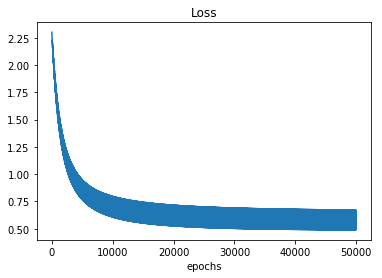

In [365]:
W = train(training_data[0], training_data[1], num_epoch=1000)

In [366]:
#For MNIST dataset
def accuracy(W):
    y_pred=make_prediction(test_data[0],W)
    right=0
    wrong=0
    for i,j in zip(test_data[1],y_pred):
        if i==j:
            right = right + 1
        else:
            wrong = wrong + 1
    print("Accuracy: " + str(right/(right+wrong)*100)) 
    print("Classification report: \n"+ str(classification_report(test_data[1], y_pred)))
    print("Confusion matrix : \n"+ str(confusion_matrix(test_data[1], y_pred)))
   
    newList = np.array([np.argmax(t) for t in y_pred])
    majorityListMNIST.append(newList)
    print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))

In [367]:
accuracy(W)

Accuracy: 89.82
Classification report: 
             precision    recall  f1-score   support

          0       0.92      0.98      0.95       980
          1       0.94      0.97      0.96      1135
          2       0.91      0.85      0.88      1032
          3       0.88      0.89      0.89      1010
          4       0.89      0.91      0.90       982
          5       0.89      0.81      0.85       892
          6       0.92      0.93      0.92       958
          7       0.91      0.89      0.90      1028
          8       0.85      0.85      0.85       974
          9       0.86      0.88      0.87      1009

avg / total       0.90      0.90      0.90     10000

Confusion matrix : 
[[ 957    0    2    3    0    0   10    1    7    0]
 [   0 1103    2    4    1    2    4    0   19    0]
 [  13    9  881   19   18    0   20   22   42    8]
 [   6    2   17  898    1   31    7   15   20   13]
 [   2    6    5    0  898    1   10    1    8   51]
 [  16    8    5   46   15  724   19

# Logistic regression Model-3

In [449]:
from sklearn.linear_model import LogisticRegression

#For MNIST dataset
clf = LogisticRegression(random_state=1, solver='lbfgs',multi_class='multinomial').fit(training_data[0], training_data[1])
LogValidationVec=clf.predict(validation_data[0])
LogTestVec=clf.predict(test_data[0])
clf.score(training_data[0], training_data[1])
majorityListMNIST.append(LogTestVec)

In [450]:
print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))
print("Classification report: \n"+ str(classification_report(test_data[1], LogTestVec)))
print("Confusion matrix : \n"+ str(confusion_matrix(test_data[1], LogTestVec)))

majorityListMNIST shape: (3, 10000)
Classification report: 
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       980
          1       0.96      0.98      0.97      1135
          2       0.93      0.90      0.91      1032
          3       0.91      0.91      0.91      1010
          4       0.94      0.93      0.93       982
          5       0.90      0.87      0.89       892
          6       0.93      0.95      0.94       958
          7       0.93      0.93      0.93      1028
          8       0.88      0.88      0.88       974
          9       0.91      0.91      0.91      1009

avg / total       0.93      0.93      0.93     10000

Confusion matrix : 
[[ 958    0    0    2    1    7    6    5    1    0]
 [   0 1113    3    1    0    2    4    2   10    0]
 [   4   10  931   16    5    4   16    9   33    4]
 [   4    1   18  918    2   23    4   11   21    8]
 [   1    2    6    3  912    0    9    5    8   36]
 [  10    3    4

In [451]:
#For USPS dataset
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(training_data[0], training_data[1])
LogTrainingVec=clf.predict(USPSMat)
clf.score(USPSMat, USPSTar)
majorityListUSPS.append(LogTrainingVec)

In [452]:
print("majorityListUSPS shape: "+ str(np.matrix(majorityListUSPS).shape))
print("Classification report: \n"+ str(classification_report(USPSTar, LogTrainingVec)))
print("Confusion matrix : \n"+ str(confusion_matrix(USPSTar, LogTrainingVec)))

majorityListUSPS shape: (1, 19999)
Classification report: 
             precision    recall  f1-score   support

          0       0.40      0.18      0.25      2000
          1       0.69      0.13      0.22      2000
          2       0.34      0.63      0.45      1999
          3       0.25      0.41      0.31      2000
          4       0.52      0.34      0.41      2000
          5       0.28      0.59      0.38      2000
          6       0.65      0.27      0.38      2000
          7       0.21      0.36      0.26      2000
          8       0.17      0.10      0.12      2000
          9       0.28      0.10      0.15      2000

avg / total       0.38      0.31      0.29     19999

Confusion matrix : 
[[ 369    1  198  189   79  339   42  502   93  188]
 [  41  264  401  140  254  237   15  489  132   27]
 [  48   29 1267  117   23  336   68   42   46   23]
 [  36    6  310  821   10  679    5   68   46   19]
 [  33    7   81   57  684  203   24  633  166  112]
 [  41    6  353 

# Neural Network Model-1

In [372]:
# Defining Placeholder
inputTensor  = tf.placeholder(tf.float32, [None, 784])
outputTensor = tf.placeholder(tf.float32, [None, 10])

In [373]:
NUM_HIDDEN_NEURONS_LAYER_1 = 2000
LEARNING_RATE = 0.02

# Initializing the weights to Normal Distribution
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.01))

# Initializing the input to hidden layer weights
input_hidden_weights  = init_weights([784, NUM_HIDDEN_NEURONS_LAYER_1])
# Initializing the hidden to output layer weights
hidden_output_weights = init_weights([NUM_HIDDEN_NEURONS_LAYER_1, 10])

# Computing values at the hidden layer
#print("inputTensor: "+str(inputTensor))
#print("input_hidden_weights: "+str(input_hidden_weights))
hidden_layer = tf.nn.relu(tf.matmul(inputTensor, input_hidden_weights))
# Computing values at the output layer
output_layer = tf.matmul(hidden_layer, hidden_output_weights)

# Defining Error Function
error_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=outputTensor))

# Defining Learning Algorithm and Training Parameters
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(error_function)

# Prediction Function
prediction = output_layer

# Training the model

In [374]:
NUM_OF_EPOCHS = 300
BATCH_SIZE = 50

training_accuracy = []

with tf.Session() as sess:
    
    # Set Global Variables ?
    tf.global_variables_initializer().run()

    for epoch in tqdm_notebook(range(NUM_OF_EPOCHS)):
        
        
        sess.run(training, feed_dict={inputTensor: training_data[0], 
                                          outputTensor: training_label})
        # Training accuracy for an epoch
        #training_accuracy.append(np.mean(np.argmax(training_label[0], axis=1) ==
                             #sess.run(prediction, feed_dict={inputTensor: training_data[0],
                                                             #outputTensor: training_label[0]})))
        
    predictedTestLabelMNIST = sess.run(prediction, feed_dict={inputTensor: test_data[0]})
    predictedTestLabelUSPS = sess.run(prediction, feed_dict={inputTensor: USPSMat})

In [375]:
#For MNIST dataset
def accuracy_model(predicted_labels, actual_labels):
    count=0
    print("predicted_labels :"+ str(predicted_labels.shape))
    print("actual_labels :"+ str(actual_labels.shape))
    for i in range(len(predicted_labels)):
        if np.argmax(predicted_labels[i])==np.argmax(actual_labels[i]):
            count=count+1;
    accuracy= (count/len(predicted_labels))*100
    NN1_MNIST_pred=np.array([np.argmax(t) for t in predicted_labels])
    #print(pred.shape)
    
    print("Accuracy: "+ str(accuracy))
    print("Classification report: \n"+ str(classification_report(test_data[1], NN1_MNIST_pred)))
    print("Confusion matrix : \n"+ str(confusion_matrix(test_data[1], NN1_MNIST_pred)))
    majorityListMNIST.append(NN1_MNIST_pred)
    print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))
    return accuracy
accuracy_model(predictedTestLabelMNIST,test_label)

predicted_labels :(10000, 10)
actual_labels :(10000, 10)
Accuracy: 83.45
Classification report: 
             precision    recall  f1-score   support

          0       0.88      0.96      0.92       980
          1       0.85      0.97      0.90      1135
          2       0.87      0.80      0.83      1032
          3       0.75      0.87      0.80      1010
          4       0.82      0.84      0.83       982
          5       0.90      0.55      0.68       892
          6       0.86      0.91      0.89       958
          7       0.87      0.86      0.87      1028
          8       0.79      0.75      0.77       974
          9       0.80      0.78      0.79      1009

avg / total       0.84      0.83      0.83     10000

Confusion matrix : 
[[ 945    0    3    4    0    5   17    1    5    0]
 [   0 1100    5    4    0    0    4    1   21    0]
 [  25   47  823   27   27    0   28   18   37    0]
 [   6    8   29  879    0   14    7   22   36    9]
 [   2   12    4    0  822    0 

83.45

In [376]:
#For USPS dataset

def accuracy_model(predicted_labels, actual_labels):
    count=0
    print("predicted_labels :"+ str(predicted_labels.shape))
    print("actual_labels :"+ str(actual_labels.shape))
    for i in range(len(predicted_labels)):
        if np.argmax(predicted_labels[i])==np.argmax(actual_labels[i]):
            count=count+1;
    accuracy= (count/len(predicted_labels))*100
    NN1_USPS_pred=np.array([np.argmax(t) for t in predicted_labels])
    #print(pred.shape)
    
    print("Accuracy: "+ str(accuracy))
    print("Classification report: \n"+ str(classification_report(USPSTar, NN1_USPS_pred)))
    print("Confusion matrix : \n"+ str(confusion_matrix(USPSTar, NN1_USPS_pred)))
    majorityListUSPS.append(NN1_USPS_pred)
    print("majorityListUSPS shape: "+ str(np.matrix(majorityListUSPS).shape))
    return accuracy
accuracy_model(predictedTestLabelUSPS,one_hot_encode(USPSTar,10))

predicted_labels :(19999, 10)
actual_labels :(19999, 10)
Accuracy: 31.071553577678884
Classification report: 
             precision    recall  f1-score   support

          0       0.20      0.37      0.26      2000
          1       0.28      0.17      0.21      2000
          2       0.31      0.55      0.40      1999
          3       0.40      0.54      0.46      2000
          4       0.42      0.50      0.45      2000
          5       0.44      0.26      0.33      2000
          6       0.42      0.31      0.36      2000
          7       0.19      0.16      0.17      2000
          8       0.23      0.21      0.22      2000
          9       0.20      0.05      0.08      2000

avg / total       0.31      0.31      0.29     19999

Confusion matrix : 
[[ 731    6  409   57  446   28  112   39   50  122]
 [ 339  330  200  166  233   18   46  397  251   20]
 [ 379   54 1091  103   56   26  129   86   65   10]
 [ 226    8  162 1080   47  157   44   93  135   48]
 [ 217  101   55   

31.071553577678884

# Neural network Model-2

In [377]:
#For MNIST dataset
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state=1)
clf.fit(training_data[0], training_data[1])
NN_MNIST_pred=clf.predict(test_data[0])
clf.score(training_data[0], training_data[1])


0.90226

In [453]:
majorityListMNIST.append(NN_MNIST_pred)
print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))
print("Classification report: \n"+ str(classification_report(test_data[1], NN_MNIST_pred)))
print("Confusion matrix : \n"+ str(confusion_matrix(test_data[1], NN_MNIST_pred)))

majorityListMNIST shape: (4, 10000)
Classification report: 
             precision    recall  f1-score   support

          0       0.94      0.97      0.95       980
          1       0.95      0.97      0.96      1135
          2       0.93      0.89      0.91      1032
          3       0.87      0.88      0.87      1010
          4       0.88      0.92      0.90       982
          5       0.82      0.82      0.82       892
          6       0.93      0.93      0.93       958
          7       0.94      0.90      0.92      1028
          8       0.85      0.82      0.83       974
          9       0.88      0.87      0.88      1009

avg / total       0.90      0.90      0.90     10000

Confusion matrix : 
[[ 953    0    2    1    0   13    9    1    1    0]
 [   0 1097    2    5    1    2    2    2   24    0]
 [  11    8  917   21   11    9   16   12   24    3]
 [   2    7   25  889    1   40    0   18   24    4]
 [   3    2    4    0  907    3    9    3   11   40]
 [  14    1    4

In [454]:
#For USPS dataset
clf = MLPClassifier(random_state=0, solver='lbfgs',alpha=1e-5, hidden_layer_sizes=(10, 10)).fit(training_data[0], training_data[1])
NN_USPS_predict=clf.predict(USPSMat)
clf.score(USPSMat, USPSTar)
majorityListUSPS.append(NN_USPS_predict)
print("majorityListUSPS shape: "+ str(np.matrix(majorityListUSPS).shape))
print("Classification report: \n"+ str(classification_report(USPSTar, NN_USPS_predict)))
print("Confusion matrix : \n"+ str(confusion_matrix(USPSTar, NN_USPS_predict)))

majorityListUSPS shape: (2, 19999)
Classification report: 
             precision    recall  f1-score   support

          0       0.36      0.28      0.31      2000
          1       0.36      0.14      0.20      2000
          2       0.39      0.51      0.44      1999
          3       0.32      0.53      0.40      2000
          4       0.52      0.42      0.46      2000
          5       0.27      0.47      0.35      2000
          6       0.50      0.39      0.44      2000
          7       0.26      0.34      0.29      2000
          8       0.26      0.12      0.16      2000
          9       0.21      0.17      0.19      2000

avg / total       0.34      0.34      0.32     19999

Confusion matrix : 
[[ 558    5  123  100  131  260  101  143   68  511]
 [  55  282  229   79  293  259   92  562   85   64]
 [ 141   36 1013  233   42  228  168   76   39   23]
 [  44   20  242 1060    5  512   14   65   26   12]
 [  25   36   37   28  841  157  105  372   92  307]
 [ 148   51  187 

# RandomForestClassifier Model-1

In [380]:
#For MNIST dataset
classifier2 = RandomForestClassifier(n_estimators=10);
classifier2.fit(training_data[0], training_data[1]) 
rfc_pred_MNIST=classifier2.predict(test_data[0])
right=0
wrong=0
for i,j in zip(test_data[1],rfc_pred_MNIST):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(test_data[1], rfc_pred_MNIST)))
print("Confusion matrix: \n"+str(confusion_matrix(test_data[1], rfc_pred_MNIST)))
majorityListMNIST.append(rfc_pred_MNIST)
print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))

Accuracy: 94.47
Classification report: 
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       980
          1       0.98      0.99      0.98      1135
          2       0.93      0.95      0.94      1032
          3       0.91      0.92      0.92      1010
          4       0.95      0.95      0.95       982
          5       0.93      0.92      0.93       892
          6       0.96      0.96      0.96       958
          7       0.96      0.94      0.95      1028
          8       0.94      0.90      0.92       974
          9       0.94      0.92      0.93      1009

avg / total       0.94      0.94      0.94     10000

Confusion matrix: 
[[ 961    0    3    0    1    5    3    1    5    1]
 [   1 1121    2    4    0    2    2    1    1    1]
 [  10    2  985    6    1    1    7   10    9    1]
 [   1    0   22  934    0   22    2   10   15    4]
 [   0    3    7    1  928    2    7    3    5   26]
 [   5    1    5   37    5  817    8 

In [381]:
#For USPS dataset
classifier2 = RandomForestClassifier(n_estimators=10);
classifier2.fit(training_data[0], training_data[1]) 
rfc_pred_USPS=classifier2.predict(USPSMat)
right=0
wrong=0
for i,j in zip(USPSTar,rfc_pred_USPS):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(USPSTar, rfc_pred_USPS)))
print("Confusion matrix: \n"+str(confusion_matrix(USPSTar, rfc_pred_USPS)))
majorityListUSPS.append(rfc_pred_USPS)
print("majorityListUSPS shape: "+ str(np.matrix(majorityListUSPS).shape))

Accuracy: 31.82159107955398
Classification report: 
             precision    recall  f1-score   support

          0       0.32      0.29      0.31      2000
          1       0.23      0.30      0.26      2000
          2       0.29      0.42      0.35      1999
          3       0.39      0.50      0.44      2000
          4       0.35      0.46      0.40      2000
          5       0.32      0.46      0.38      2000
          6       0.53      0.25      0.34      2000
          7       0.19      0.26      0.22      2000
          8       0.33      0.07      0.12      2000
          9       0.22      0.06      0.09      2000

avg / total       0.32      0.31      0.29     19999

Confusion matrix: 
[[ 586   74  300   86  391  160   96  129   21  157]
 [  61  602  130  127  185   69   24  775   18    9]
 [ 217  192  831  122  117  165   78  225   25   27]
 [  86   80  179 1004   91  324   19  165   23   29]
 [  27  291  131  103  919  112   34  295   39   49]
 [ 195  109  185  237  11

# Random Forest Model-2

In [455]:
#For MNIST dataset
classifier2 = RandomForestClassifier(n_estimators=100);
classifier2.fit(training_data[0], training_data[1]) 
rfc2_pred_MNIST=classifier2.predict(test_data[0])
right=0
wrong=0
for i,j in zip(test_data[1],rfc2_pred_MNIST):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(test_data[1], rfc2_pred_MNIST)))
print("Confusion matrix: \n"+str(confusion_matrix(test_data[1], rfc2_pred_MNIST)))
majorityListMNIST.append(rfc2_pred_MNIST)
print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))

Accuracy: 96.82
Classification report: 
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.96      0.97      0.97      1032
          3       0.95      0.96      0.96      1010
          4       0.97      0.97      0.97       982
          5       0.97      0.96      0.96       892
          6       0.97      0.98      0.98       958
          7       0.97      0.97      0.97      1028
          8       0.96      0.95      0.95       974
          9       0.96      0.95      0.95      1009

avg / total       0.97      0.97      0.97     10000

Confusion matrix: 
[[ 969    0    0    0    0    1    4    1    4    1]
 [   0 1118    3    3    1    2    3    0    4    1]
 [   6    1  999    5    2    0    4    9    6    0]
 [   0    0    9  973    0    8    0    9    7    4]
 [   1    0    2    0  957    0    4    0    2   16]
 [   4    0    0   15    3  852    6 

In [456]:
#For USPS dataset
classifier2 = RandomForestClassifier(n_estimators=100);
classifier2.fit(training_data[0], training_data[1]) 
rfc2_pred_USPS=classifier2.predict(USPSMat)
right=0
wrong=0
for i,j in zip(USPSTar,rfc2_pred_USPS):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(USPSTar, rfc2_pred_USPS)))
print("Confusion matrix: \n"+str(confusion_matrix(USPSTar, rfc2_pred_USPS)))
majorityListUSPS.append(rfc2_pred_USPS)
print("majorityListUSPS shape: "+ str(np.matrix(majorityListUSPS).shape))

Accuracy: 39.171958597929894
Classification report: 
             precision    recall  f1-score   support

          0       0.46      0.32      0.38      2000
          1       0.36      0.27      0.31      2000
          2       0.42      0.62      0.50      1999
          3       0.52      0.63      0.57      2000
          4       0.48      0.54      0.50      2000
          5       0.33      0.70      0.44      2000
          6       0.74      0.37      0.50      2000
          7       0.20      0.34      0.25      2000
          8       0.52      0.08      0.13      2000
          9       0.24      0.05      0.09      2000

avg / total       0.43      0.39      0.37     19999

Confusion matrix: 
[[ 649    9  257   63  459  154   72   98    1  238]
 [  31  545  119  117   66  113   23  966   16    4]
 [  89   30 1242   82   57  222   18  250    7    2]
 [  39    9  106 1258   59  345    3  152    3   26]
 [   6  202   67   23 1070  209   21  365   21   16]
 [ 148   23  132  108   

# Random Forest Model-3

In [457]:
#For MNIST dataset
classifier2 = RandomForestClassifier(n_estimators=1000);
classifier2.fit(training_data[0], training_data[1]) 
rfc3_pred_MNIST=classifier2.predict(test_data[0])
right=0
wrong=0
for i,j in zip(test_data[1],rfc3_pred_MNIST):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(test_data[1], rfc3_pred_MNIST)))
print("Confusion matrix: \n"+str(confusion_matrix(test_data[1], rfc3_pred_MNIST)))
majorityListMNIST.append(rfc3_pred_MNIST)
print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))

Accuracy: 97.05
Classification report: 
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.96      0.97      0.97      1032
          3       0.96      0.97      0.96      1010
          4       0.97      0.97      0.97       982
          5       0.97      0.97      0.97       892
          6       0.98      0.98      0.98       958
          7       0.97      0.96      0.97      1028
          8       0.96      0.96      0.96       974
          9       0.96      0.95      0.95      1009

avg / total       0.97      0.97      0.97     10000

Confusion matrix: 
[[ 969    0    1    0    0    3    3    1    3    0]
 [   0 1122    3    3    0    2    2    0    2    1]
 [   6    0  999    5    3    0    4    9    6    0]
 [   0    0   10  975    0    6    0    9    7    3]
 [   1    0    0    0  956    0    5    0    3   17]
 [   2    0    0   11    3  861    5 

In [458]:
#For USPS dataset
classifier2 = RandomForestClassifier(n_estimators=1000);
classifier2.fit(training_data[0], training_data[1]) 
rfc3_pred_USPS=classifier2.predict(USPSMat)
right=0
wrong=0
for i,j in zip(USPSTar,rfc3_pred_USPS):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(USPSTar, rfc3_pred_USPS)))
print("Confusion matrix: \n"+str(confusion_matrix(USPSTar, rfc3_pred_USPS)))
majorityListUSPS.append(rfc3_pred_USPS)
print("majorityListUSPS shape: "+ str(np.matrix(majorityListUSPS).shape))

Accuracy: 40.8270413520676
Classification report: 
             precision    recall  f1-score   support

          0       0.47      0.33      0.39      2000
          1       0.38      0.29      0.33      2000
          2       0.44      0.64      0.52      1999
          3       0.55      0.65      0.59      2000
          4       0.50      0.54      0.52      2000
          5       0.35      0.74      0.47      2000
          6       0.79      0.42      0.55      2000
          7       0.19      0.35      0.25      2000
          8       0.55      0.08      0.14      2000
          9       0.24      0.05      0.08      2000

avg / total       0.45      0.41      0.38     19999

Confusion matrix: 
[[ 650   12  279   53  447  158   56   96    2  247]
 [  45  576  111  107   50   93   16  988   13    1]
 [  90   29 1289   71   46  190   15  262    5    2]
 [  38    7   93 1300   47  308    3  186    3   15]
 [  11  203   53   26 1076  182   12  398   19   20]
 [ 139   29  127   69   22

# SVM-Model-1

In [382]:
#For MNIST dataset
classifier1 = SVC(kernel='rbf', C=1);
classifier1.fit(training_data[0], training_data[1])
svm_pred_MNIST=classifier1.predict(test_data[0])

In [383]:
#SVM pred for MNIST dataset

right=0
wrong=0
for i,j in zip(test_data[1],svm_pred_MNIST):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(test_data[1], svm_pred_MNIST)))
print("Confusion matrix: \n"+str(confusion_matrix(test_data[1], svm_pred_MNIST)))
majorityListMNIST.append(svm_pred_MNIST)
print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))

Accuracy: 94.35
Classification report: 
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       980
          1       0.97      0.99      0.98      1135
          2       0.94      0.93      0.94      1032
          3       0.93      0.94      0.93      1010
          4       0.93      0.95      0.94       982
          5       0.93      0.91      0.92       892
          6       0.95      0.96      0.96       958
          7       0.95      0.93      0.94      1028
          8       0.94      0.91      0.93       974
          9       0.94      0.91      0.93      1009

avg / total       0.94      0.94      0.94     10000

Confusion matrix: 
[[ 967    0    1    0    0    5    4    1    2    0]
 [   0 1120    2    3    0    1    3    1    5    0]
 [   9    1  962    7   10    1   13   11   16    2]
 [   1    1   14  950    1   17    1   10   11    4]
 [   1    1    7    0  937    0    7    2    2   25]
 [   7    4    5   33    7  808   11 

In [337]:
#For USPS dataset
classifier1 = SVC(kernel='rbf', C=1);
classifier1.fit(training_data[0], training_data[1])
svm_pred_USPS=classifier1.predict(USPSMat)

In [397]:
#SVM pred for USPS dataset
right=0
wrong=0
for i,j in zip(USPSTar,svm_pred_USPS):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(USPSTar, svm_pred_USPS)))
print("Confusion matrix: \n"+str(confusion_matrix(USPSTar, svm_pred_USPS)))
majorityListUSPS.append(svm_pred_USPS)
print("majorityListUSPS shape: "+ str(np.matrix(majorityListUSPS).shape))

Accuracy: 38.54192709635482
Classification report: 
             precision    recall  f1-score   support

          0       0.42      0.29      0.34      2000
          1       0.45      0.21      0.29      2000
          2       0.35      0.70      0.46      1999
          3       0.51      0.56      0.53      2000
          4       0.52      0.58      0.55      2000
          5       0.29      0.68      0.41      2000
          6       0.66      0.37      0.48      2000
          7       0.24      0.23      0.23      2000
          8       0.37      0.12      0.18      2000
          9       0.27      0.10      0.15      2000

avg / total       0.41      0.39      0.36     19999

Confusion matrix: 
[[ 573    2  428   19  285  248   73   44    6  322]
 [ 110  429  285  137  273  180   46  501   22   17]
 [ 128   18 1402   59   39  198   61   57   23   14]
 [  76    3  186 1123   11  483    5   70   27   16]
 [  18   67   91   14 1167  267   22  194   69   91]
 [ 108   17  257  102   2

# SVM-Model-2

In [ ]:
#For MNIST dataset
classifier1 = SVC(kernel='rbf', C=1, gamma=1);
classifier1.fit(training_data[0], training_data[1])
svm2_pred_MNIST=classifier1.predict(test_data[0])

In [ ]:
#SVM pred for MNIST dataset

right=0
wrong=0
for i,j in zip(test_data[1],svm2_pred_MNIST):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(test_data[1], svm2_pred_MNIST)))
print("Confusion matrix: \n"+str(confusion_matrix(test_data[1], svm2_pred_MNIST)))
majorityListMNIST.append(svm2_pred_MNIST)
print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))

# SVM Model-3

In [398]:
#For MNIST dataset
classifier1 = SVC(kernel='linear');
classifier1.fit(training_data[0], training_data[1])
svm3_pred_MNIST=classifier1.predict(test_data[0])

In [401]:
#SVM pred for MNIST dataset

right=0
wrong=0
for i,j in zip(test_data[1],svm3_pred_MNIST):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(test_data[1], svm3_pred_MNIST)))
print("Confusion matrix: \n"+str(confusion_matrix(test_data[1], svm3_pred_MNIST)))
majorityListMNIST.append(svm3_pred_MNIST)
print("majorityListMNIST shape: "+ str(np.matrix(majorityListMNIST).shape))

Accuracy: 93.89999999999999
Classification report: 
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.97      0.99      0.98      1135
          2       0.92      0.94      0.93      1032
          3       0.90      0.93      0.92      1010
          4       0.93      0.96      0.95       982
          5       0.92      0.89      0.91       892
          6       0.96      0.95      0.95       958
          7       0.95      0.93      0.94      1028
          8       0.93      0.89      0.91       974
          9       0.95      0.91      0.93      1009

avg / total       0.94      0.94      0.94     10000

Confusion matrix: 
[[ 959    0    5    2    2    4    7    0    1    0]
 [   0 1121    3    3    0    1    2    1    4    0]
 [   6    8  968    9    3    2   11   10   13    2]
 [   5    2   17  944    4   13    1    8   13    3]
 [   2    1   10    1  943    0    4    2    2   17]
 [  13    4    2   39    

In [402]:
#For USPS dataset
classifier1 = SVC(kernel='linear');
classifier1.fit(training_data[0], training_data[1])
svm3_pred_USPS=classifier1.predict(USPSMat)

In [403]:
#SVM pred for USPS dataset
right=0
wrong=0
for i,j in zip(USPSTar,svm3_pred_USPS):
    if i==j:
        right = right + 1
    else:
        wrong = wrong + 1
print("Accuracy: " + str(right/(right+wrong)*100)) 
print("Classification report: \n"+ str(classification_report(USPSTar, svm3_pred_USPS)))
print("Confusion matrix: \n"+str(confusion_matrix(USPSTar, svm3_pred_USPS)))
majorityListUSPS.append(svm3_pred_USPS)
print("majorityListUSPS shape: "+ str(np.matrix(majorityListUSPS).shape))

Accuracy: 29.12645632281614
Classification report: 
             precision    recall  f1-score   support

          0       0.36      0.17      0.24      2000
          1       0.49      0.15      0.23      2000
          2       0.25      0.65      0.36      1999
          3       0.25      0.45      0.32      2000
          4       0.46      0.40      0.43      2000
          5       0.24      0.44      0.31      2000
          6       0.61      0.23      0.33      2000
          7       0.23      0.26      0.24      2000
          8       0.25      0.08      0.12      2000
          9       0.28      0.08      0.13      2000

avg / total       0.34      0.29      0.27     19999

Confusion matrix: 
[[ 348    0  476  152  222  345   74  172   10  201]
 [  60  303  534  275  230  172   17  351   37   21]
 [ 139   63 1293  115   33  221   55   45   21   14]
 [  56   58  341  898    8  520    9   45   48   17]
 [  24   24  221   82  800  215   10  464   82   78]
 [  47   25  652  240   4

In [414]:
np.savetxt("SVM3MNIST.txt",svm3_pred_MNIST,fmt='%i')
np.savetxt("SVM3USPS.txt",svm3_pred_USPS,fmt='%i')
np.savetxt("SVM1USPS.txt",svm_pred_USPS,fmt='%i')
np.savetxt("SVM1MNIST.txt",svm_pred_MNIST,fmt='%i')

# Majority voting

# FOR MNIST dataset

In [391]:
def findMajority(majorityListMNIST):
    m=stats.mode(np.array(majorityListMNIST))
    right=0
    wrong=0
    for i,j in zip(test_data[1],m[0][0]):
        if i==j:
            right = right + 1
        else:
            wrong = wrong + 1
    print("Accuracy: " + str(right/(right+wrong)*100)) 
    print("Classification report: \n"+ str(classification_report(test_data[1], m[0][0])))
    print("Confusion matrix: \n"+str(confusion_matrix(test_data[1], m[0][0])))

In [394]:
findMajority(majorityListMNIST)

Accuracy: 93.42
Classification report: 
             precision    recall  f1-score   support

          0       0.89      0.99      0.94       980
          1       0.97      0.99      0.98      1135
          2       0.94      0.92      0.93      1032
          3       0.89      0.94      0.92      1010
          4       0.94      0.95      0.94       982
          5       0.95      0.86      0.90       892
          6       0.95      0.96      0.95       958
          7       0.94      0.94      0.94      1028
          8       0.93      0.89      0.91       974
          9       0.95      0.91      0.93      1009

avg / total       0.93      0.93      0.93     10000

Confusion matrix: 
[[ 972    0    1    2    0    1    2    1    1    0]
 [   0 1121    2    2    0    1    4    1    4    0]
 [  21    6  946    9    6    0   14   12   18    0]
 [   7    0   20  946    0    8    0   13   14    2]
 [   4    1    4    0  930    0   10    2    6   25]
 [  23    2    3   56    6  766   10 

# FOR USPS dataset

In [395]:
def findMajority(majorityListUSPS):
    m=stats.mode(np.array(majorityListUSPS))
    right=0
    wrong=0
    for i,j in zip(USPSTar,m[0][0]):
        if i==j:
            right = right + 1
        else:
            wrong = wrong + 1
    print("Accuracy: " + str(right/(right+wrong)*100)) 
    print("Classification report: \n"+ str(classification_report(USPSTar, m[0][0])))
    print("Confusion matrix: \n"+str(confusion_matrix(USPSTar, m[0][0])))

In [396]:
findMajority(majorityListUSPS)

Accuracy: 31.046552327616382
Classification report: 
             precision    recall  f1-score   support

          0       0.20      0.68      0.30      2000
          1       0.38      0.16      0.22      2000
          2       0.36      0.52      0.42      1999
          3       0.36      0.51      0.42      2000
          4       0.63      0.38      0.47      2000
          5       0.48      0.26      0.34      2000
          6       0.56      0.20      0.30      2000
          7       0.24      0.16      0.19      2000
          8       0.21      0.20      0.20      2000
          9       0.26      0.03      0.06      2000

avg / total       0.37      0.31      0.29     19999

Confusion matrix: 
[[1355    2  242   53  136   24   20   21   43  104]
 [ 441  321  251  183  114   38   24  363  263    2]
 [ 641   34 1041   76   14   24   62   42   59    6]
 [ 570    4  115 1024    5  131   17   20  102   12]
 [ 436   65   70   95  759   45   21  183  280   46]
 [ 801   17  183  289   